# Part II: Data Wrangling

## Issues
`Transactions Sheet`
1. product_first_sold_date the title is misleading
2. missing values in online_order, brand, product_line, product_sales, product_size, list_price, standard_cost and product_first_sold_date
3. online_order value should not be a float, it should be int with 0/1, or Boolean with True/False

`NewCustomerList Sheet`
1. Four columns doesnt have name description
2. past_3_years_bike_related_purchases column name is too long
3. deceased_indicator and owns_car there values should be consistent
4. missing values in last_name, job_title, DOB, and job_industry_category.
5. Gender has invalid value 'U'
6. deceased indicator is unique, therefore not important, it should be discarded
7. country is unique, should be discarded.

`CustomerDemographic sheet`
1. missing values in six columns (last_name, DOB, job_title, job_industry_category, default, tenure)
2. inconsistent values in gender column
3. the Y/N in deceased_indicator column should be Yes/No
4. the default column should be discarded


`CustomerAddress sheet`
1. consistency issue in state column New South Wales and Victoria should be replaced by NSW and VIC respectively
2. Counrty column is unique, it should be discarded


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = pd.ExcelFile('KPMG_bicycle.xlsx')
file.sheet_names

['Title Sheet',
 'Transactions',
 'NewCustomerList',
 'CustomerDemographic',
 'CustomerAddress']

In [3]:
df_tran = pd.read_excel(file, 'Transactions', header=1)
df_tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# `Transaction Table`

In [34]:
df1 = df_tran.copy()

## Issue #1: product_first_sold_date the title is misleading

### Define: 
use `.rename` method to correct the column name
### Code

In [35]:
df1.rename(columns = {'product_first_sold_date': 'product_first_sold'}, inplace=True)

### Test

In [36]:
assert 'product_first_sold_date' not in df1.columns

## Issue #2: missing values in online_order, brand, product_line, product_sales, product_size, list_price, standard_cost and product_first_sold_date

In [37]:
nulls = df1.isnull().sum()
nulls[nulls>0]

online_order          360
brand                 197
product_line          197
product_class         197
product_size          197
standard_cost         197
product_first_sold    197
dtype: int64

In [38]:
nulls[nulls>0]/df1.shape[0]*100

online_order          1.800
brand                 0.985
product_line          0.985
product_class         0.985
product_size          0.985
standard_cost         0.985
product_first_sold    0.985
dtype: float64

In [39]:
df1[df1.brand.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


**drop those related to product**

In [40]:
df1[df1.online_order.isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [41]:
df1.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

### Define:
use use the mode to replace missing values in the online_order, and we drop the other rows with missing values
### Code:

In [42]:
df1.online_order.fillna(df1.online_order.mode()[0], inplace=True)

### Test

In [43]:
df1.online_order.isnull().any()

False

In [44]:
df1.online_order.value_counts()

1.0    10189
0.0     9811
Name: online_order, dtype: int64

In [48]:
#drop other rows
df1.dropna(axis=0, inplace=True)

### Test

In [50]:
df1.isnull().sum().any()

False

## Issue #3: online_order value should not be a float

### Define:
Use `astype` to change the type of the column to int
### Code:

In [51]:
df1.online_order = df1.online_order.astype('int')

### Test

In [52]:
df1.online_order.dtype

dtype('int32')

In [119]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


# `Customer Demographic Table`

In [53]:
df_cusdem = pd.read_excel(file, 'CustomerDemographic', header=1)
df_cusdem.head()

C:\Users\d\AppData\Local\Temp\ipykernel_10188\1525706453.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cusdem = pd.read_excel(file, 'CustomerDemographic', header=1)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [73]:
df2 = df_cusdem.copy()

## Issue #1: missing values in six columns (last_name, DOB, job_title, job_industry_category, default, tenure)

let's inspect it and see 

In [74]:
rows = df2.shape[0]
print(f'number of records: {rows}')
nulls = df2.isnull().sum()
nulls[nulls>0]

number of records: 4000


last_name                125
DOB                       87
job_title                506
job_industry_category    656
default                  302
tenure                    87
dtype: int64

In [75]:
nulls[nulls>0]/rows*100

last_name                 3.125
DOB                       2.175
job_title                12.650
job_industry_category    16.400
default                   7.550
tenure                    2.175
dtype: float64

Since they are > 1%, we can't drop them. lets fill with the most in the distribution.

In [76]:
df2.DOB.fillna(df2.DOB.mode()[0], inplace=True)
df2.job_title.fillna(df2.job_title.mode()[0], inplace=True)
df2.job_industry_category.fillna(df2.job_industry_category.mode()[0], inplace=True)
df2.default.dropna(axis=0, inplace=True)

<AxesSubplot:>

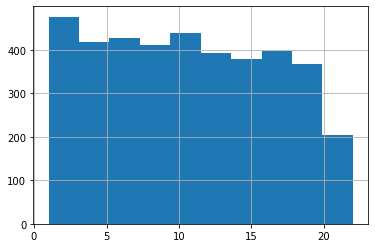

In [77]:
df2.tenure.hist()

let's use mean for tenure since its not skewed 

In [78]:
df2.tenure.fillna(df2.tenure.mean(), inplace=True)

In [79]:
#drop default column
df2.drop('default', axis=1, inplace=True)

## Test

In [80]:
df2.isnull().sum()>0

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
dtype: bool

## Issue #2: inconsistent values in gender column

In [ ]:
df2.gender.value_counts()

### Define:
use `.replace()` to replace F with Female, M with Male, and U with Unspecify
### Code

In [84]:
df2.gender = df2.gender.map({'Male':'Male', 'Female': 'Female', 'F':'Female', 'M':'Male', 'U':'Unspecify'})

## Test

In [85]:
df2.gender.value_counts()

Female       2038
Male         1873
Unspecify      88
Name: gender, dtype: int64

## Issue #3: the Y/N in deceased_indicator column should be Yes/No

In [109]:
df2.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

### Define:
use `.map` to replace Y with Yes and N with No
### Code

In [110]:
df2.deceased_indicator = df2.deceased_indicator.map({'Y':'Yes', 'N':'No'})

### Test

In [111]:
df2.deceased_indicator.unique()

array(['No', 'Yes'], dtype=object)

In [120]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,No,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,No,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,No,Yes,8.0


# `Customer Address Table`

In [112]:
df_cusadd = pd.read_excel(file, 'CustomerAddress', header=1)
df_cusadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [113]:
df3 = df_cusadd.copy()

## Issue #1: consistency issue in state column New South Wales and Victoria should be replaced by NSW and VIC respectively

In [114]:
df3.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

### Define:
use `.replace` to update the values
### Code:

In [115]:
df3.state = df3.state.replace('New South Wales', 'NSW')
df3.state = df3.state.replace('Victoria', 'VIC')

### Test

In [116]:
df3.state.unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

## Issue #2: Counrty column is unique, it should be discarded

In [117]:
df3.country.unique()

array(['Australia'], dtype=object)

### Define:
drop country column
### Code:

In [118]:
df3.drop('country', axis=1, inplace=True)

In [121]:
df3.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


## Save the files

In [122]:
df1.to_csv('Transaction.csv', index=False)
df2.to_csv('customer_demographic.csv', index=False)
df3.to_csv('customer_address.csv', index=False)